In [22]:
#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)
welfare=pd.read_csv('/content/drive/MyDrive/TEAMWORK/Korea Income and Welfare.csv',sep='\t')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 1 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker  92857 non-null  object
dtypes: object(1)
memory usage: 725.6+ KB


데이터의 모양을 좀 더 다루기 쉽게 전처리가 필요하다는 것을 알 수 있다.
comma 로 구분되어 있는 문장들을 쪼개서 각각의 column들로 만듬.



In [8]:
#아이디 변수 체크 id+year 컬럼을 합쳐서 보기로 함.
col_name = 'id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker'
cols = col_name.split(',')
new_welfare = welfare[col_name].str.split(",", n=13, expand=True)
new_welfare.columns = cols

In [9]:
new_welfare

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864,1,2,1936,2,2,2,,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600,6,1,1967,5,1,1,874,1,
92853,98000701,2015,11,5,8327,6,1,1967,5,1,1,874,1,
92854,98000701,2016,12,5,7931,6,1,1967,5,1,1,874,1,
92855,98000701,2017,13,5,8802,5,1,1967,5,1,1,874,1,


결측값 제거 및
데이터 중간 중간에 빈 데이터가 존재하므로 모두 다 NaN으로 채워주기
데이터 타입도 string이므로 int로 전환하기.


In [10]:
for col in cols:
    new_welfare[col] = pd.to_numeric(new_welfare[col], errors='coerce')
       
# for col in cols:
#     print(type(new_df[col][0]))

new_welfare.head(10)

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.000000,1,2,1936,2,2,2,NaN,NaN,8.0
1,10101,2011,7,1,896.000000,1,2,1936,2,2,2,NaN,NaN,10.0
2,10101,2012,8,1,1310.000000,1,2,1936,2,2,2,NaN,NaN,10.0
3,10101,2013,9,1,2208.000000,1,2,1936,2,2,2,NaN,NaN,1.0
4,10101,2014,10,1,864.000000,1,2,1936,2,2,2,NaN,NaN,10.0
5,10101,2015,11,1,1171.000000,1,2,1936,2,2,1,NaN,NaN,10.0
6,10101,2016,12,1,1643.000000,1,2,1936,2,2,2,NaN,NaN,10.0
7,10101,2017,13,1,851.000000,1,2,1936,2,2,2,NaN,NaN,10.0
8,20101,2005,1,1,1257.000000,1,2,1945,4,2,2,421.0,1.0,NaN
9,20101,2006,2,1,-520.062475,1,2,1945,4,2,2,NaN,NaN,8.0


결손을 시각화

id                        0
year                      0
wave                      0
region                    0
income                    0
family_member             0
gender                    0
year_born                 0
education_level           0
marriage                  0
religion                  0
occupation            33643
company_size          33642
reason_none_worker    60710
dtype: int64


<Axes: >

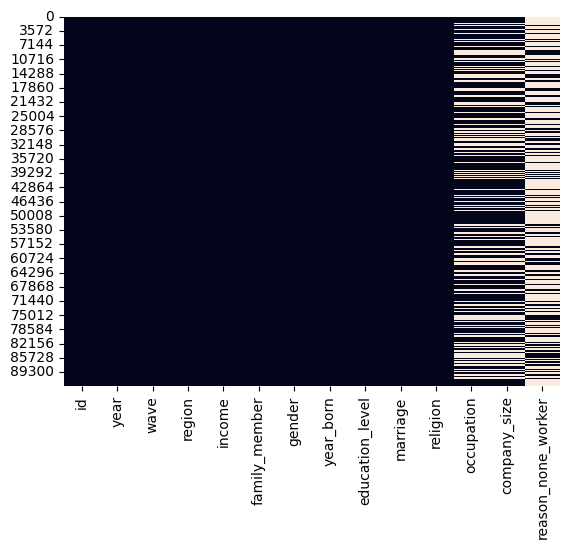

In [11]:
print(new_welfare.isnull().sum())
sns.heatmap(new_welfare.isnull(), cbar=False)

In [14]:
#타겟 변수 비율 점검 
#타겟 변수 : income
class_distribution=new_welfare['income'].value_counts(normalize=True)
print(class_distribution)

3000.0     0.000765
2400.0     0.000754
1800.0     0.000743
1200.0     0.000614
840.0      0.000603
             ...   
14459.0    0.000011
8320.0     0.000011
15467.0    0.000011
13531.0    0.000011
11600.0    0.000011
Name: income, Length: 13306, dtype: float64


In [18]:
#income 구반변수 설정 , 요약통계 검토

income_df = pd.DataFrame( new_welfare['income'] )

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000]

income_df['income_group'] = pd.cut( income_df['income'] , bins )

print( income_df['income_group'].value_counts() )

(0, 50000]          92582
(50000, 100000]        34
(100000, 150000]        5
(150000, 200000]        1
(200000, 250000]        1
(250000, 300000]        1
(450000, 500000]        1
(300000, 350000]        0
(350000, 400000]        0
(400000, 450000]        0
Name: income_group, dtype: int64


<Axes: >

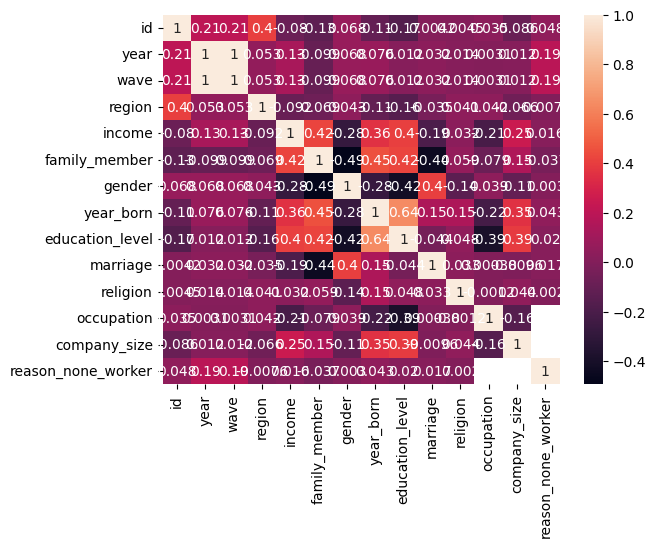

In [21]:
#seaborn으로 상관관계 검토
#날짜도 income에 영향을 미칠것이라 판단하여 따로 컬럼을 제거하지 않았습니다 
sns.heatmap( new_welfare.corr() , annot = True )

In [23]:
#t-검정
group1=np.random.normal(0,1,size=30)
group2=np.random.normal(0.5,1,size=30)

t_statistic, p_value=stats.ttest_ind(group1,group2)

print("t statistic : ",t_statistic)
print("p_value : ",p_value)

t statistic :  -0.9341553022687712
p_value :  0.3540967296957198


직업과 수입 간 어떠한 직업이 수입 정도를 알기 위해 알아봄.

먼저 한국 수입의 전체적인 비중을 차지하는 직업을 알아보고, 어떤 직업이 고소득인지 알아보겠습니다.

직업에 대한 이름과 분류는 job_code_translated.xlsx 에 있습니다. 직업데이터를 갱신하기 위해 엑셀파일을 불러와줍니다.

In [ ]:
job=pd.read_excel('/content/drive/MyDrive/TEAMWORK/job_code_translated.xlsx')

In [ ]:
df_LEFT_JOIN = pd.merge(new_welfare, job, left_on='occupation', right_on='job_code', how='left')

In [ ]:
kor_df = df_LEFT_JOIN[['id', 'year', 'wave', 'region', 'income', 'family_member', 'gender', 'year_born', 'education_level', 'marriage', 'religion', 'occupation', 'company_size', 'reason_none_worker', 'job_title']]
kor_df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job_title
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,NaN,NaN,8.0,NaN
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,NaN,NaN,10.0,NaN
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,NaN,NaN,10.0,NaN
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,NaN,NaN,1.0,NaN
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,NaN,NaN,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874.0,1.0,NaN,Goods movement equipment operator
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874.0,1.0,NaN,Goods movement equipment operator
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874.0,1.0,NaN,Goods movement equipment operator
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874.0,1.0,NaN,Goods movement equipment operator


각각의 직업만 놓고 보아서 수입이 높은 직업이 뭔지, 전체적 생산활동을 봤을 때 비중이 높은 10개 직업이 무엇인지 확인합니다. 


<Axes: xlabel='income', ylabel='job_title'>

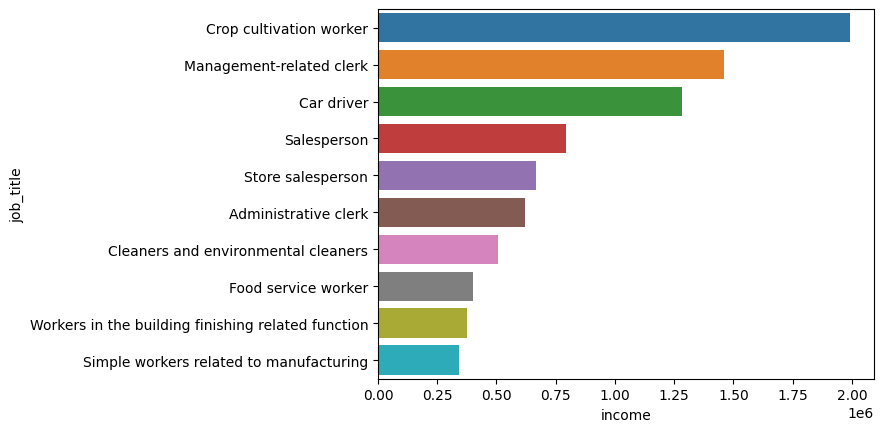

In [ ]:
#아래부터는 최소 1개 설명변수 시각화를 구현한 그래프들 입니다
top_k_income = kor_df.groupby(['year','job_title'], sort=True, as_index = False).sum()
top_k_income = top_k_income.sort_values(by = ['year', 'income'], ascending=[True,False])
top_k_income_2015 = top_k_income[top_k_income['year'] == 2015]
top_k_income_2015 = top_k_income_2015[['job_title', 'income']].head(10)
sns.barplot(x="income", y="job_title", data=top_k_income_2015)

직업의 간단한 소득 통계

In [ ]:
income_agg=kor_df.groupby('job_title').income.agg(['mean','min','max','sum']).sort_values(by = 'mean', ascending=False)
income_agg

,mean,min,max,sum
job_title,,,,
senior corporate executive,13864.736842,2568.0,61269.0,5.268600e+05
"Managers related to culture, art, design and video",12062.545455,1800.0,75683.0,2.653760e+05
Medical professional,11397.791071,280.0,75165.6,1.276553e+06
Insurance and Finance Manager,9798.697183,1212.0,23157.0,1.391415e+06
Other sales and customer service managers,8975.945455,-47.0,170204.0,1.481031e+06
...,...,...,...,...
Simple food workers,2340.641786,-120.0,22848.0,1.310759e+06
Crop cultivation worker,2330.070842,-17205.0,30420.0,2.348478e+07
Cleaners and environmental cleaners,2321.635462,-294.0,14212.0,6.500579e+06


평균적인 수입이 높은 상위 10개 직업의 표는 해당과 같습니다.

<Axes: xlabel='income', ylabel='job_title'>

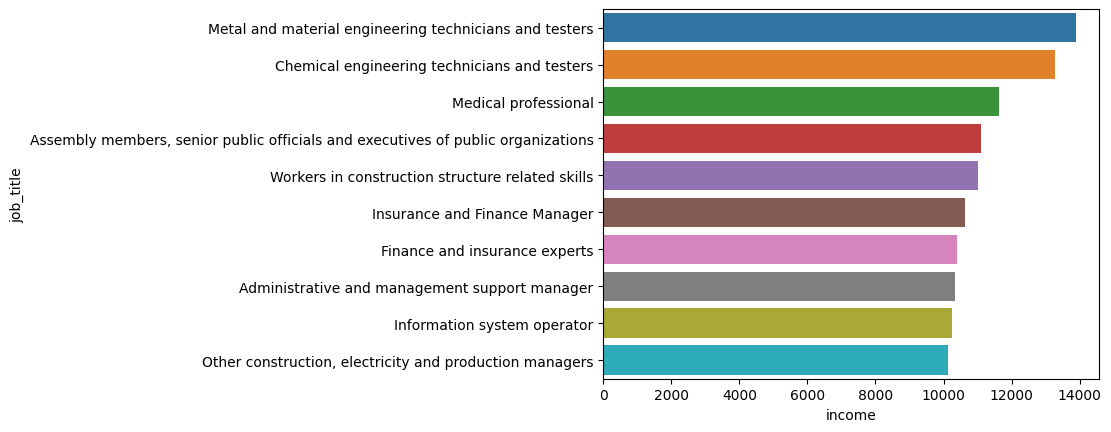

In [ ]:
#seaborn 상관관계 검토
top_k_income_job = kor_df.groupby(['year','job_title'], sort=True, as_index = False).mean()
top_k_income_job = top_k_income_job.sort_values(by = ['year', 'income'], ascending=[True,False])
top_k_income_job_2015 = top_k_income_job[top_k_income_job['year'] == 2015]
top_k_income_job_2015 = top_k_income_job_2015[['job_title', 'income']].head(10)
sns.barplot(x="income", y="job_title", data=top_k_income_job_2015)

반면 평균 소득 하위 10개 직업을 알아보겠습니다. 

In [ ]:
total_mean = kor_df[kor_df['occupation']!= 'NaN'].income.mean()
print(total_mean)
job_mean = kor_df.groupby('job_title')['income'].mean()
job_over_mean = job_mean[job_mean <= total_mean].sort_values(ascending=True)
print(job_over_mean)

3441.1223268686776
job_title
Simple workers related to agriculture, forestry and fishing         1875.865156
Housework and parenting helper                                      2221.201031
Cleaners and environmental cleaners                                 2321.635462
Crop cultivation worker                                             2330.070842
Simple food workers                                                 2340.641786
Other service related simple employees                              2571.275068
Medical and welfare related service workers                         2755.938165
Other cosmetology/ceremony and medical assistant service workers    2852.202128
Curator, librarian and records manager                              3092.896552
Forestry related workers                                            3100.923077
Esthetics, beauty and related service workers                       3123.812876
Sales-related simple employee                                       3222.358586
Horticultur

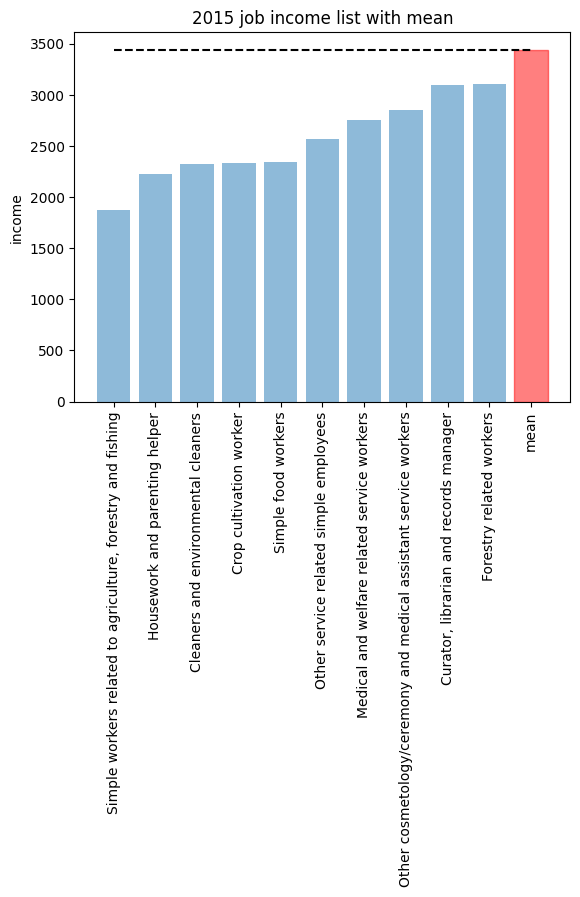

In [ ]:
n = 10
job_list = job_over_mean.head(n).index.tolist()
job_list.append('mean')
x_pos = np.arange(n+1)
income_list = job_over_mean.head(n).tolist()
income_list.append(total_mean)

bar_list = plt.bar(x_pos, income_list, align='center', alpha=0.5)
bar_list[n].set_color('r')
plt.plot([0.,n], [total_mean, total_mean], 'k--')
plt.xticks(x_pos, job_list, rotation='vertical')

plt.ylabel('income')
plt.title('2015 job income list with mean')

plt.show()

비슷한 걸로 2017 자료를 기준으로 성별로 나누겠습니다.

In [ ]:
def ratio_plot_by_group(data , value , group = None,  fig_kws={"stacked" : True, "title" : ""}) :
    if group is None :
        result = data[value].value_counts(normalize=True)
        multi_index = pd.MultiIndex.from_product([[value], result.index.unique().tolist()], 
                                         names=["group", value])
        result.index = multi_index
        result = result.unstack()
    else :
        result = data.groupby(group)[value].value_counts(normalize=True).unstack()
    return result.plot(kind="bar", 
                stacked= fig_kws.get("stacked" , True), 
                title=fig_kws.get("title",""))

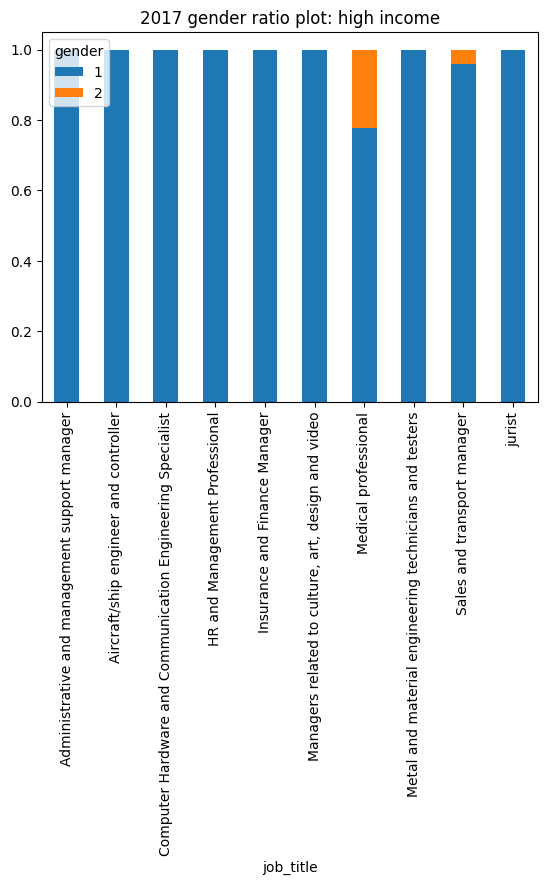

In [ ]:
top_k_income_job_2017 = top_k_income_job[top_k_income_job['year'] == 2017]
top_k_income_job_2017 = top_k_income_job_2017.head(10)
job_k_list = top_k_income_job_2017['job_title'].values

data = kor_df[kor_df['year']==2017]
data = data[data['job_title'].isin(job_k_list)]
ratio_plot_by_group(data ,"gender", group="job_title",fig_kws = {"stacked":True,"title" : "2017 gender ratio plot: high income"})
plt.show()

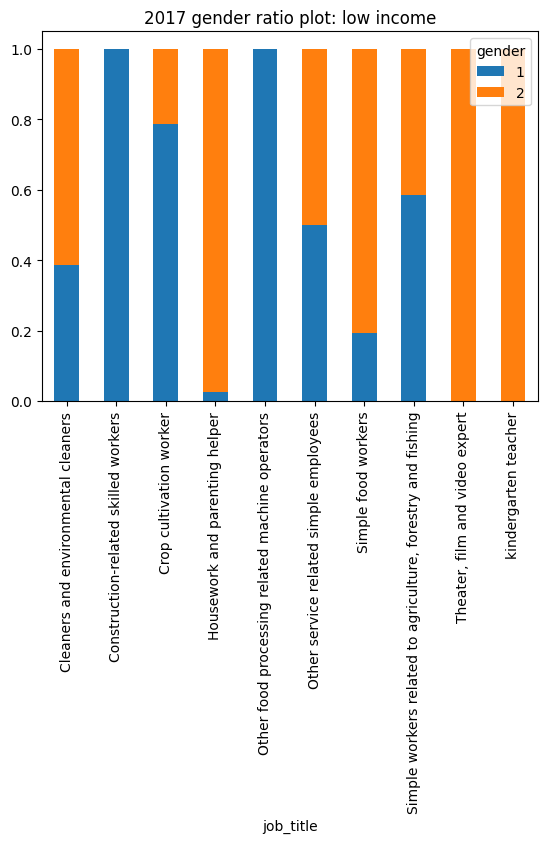

In [ ]:
low_k_income_job = kor_df.groupby(['year','job_title'], sort=True, as_index = False).mean()
low_k_income_job = low_k_income_job.sort_values(by = ['year', 'income'], ascending=[True,True])
low_k_income_job_2017 = low_k_income_job[low_k_income_job['year'] == 2017]
low_k_income_job_2017 = low_k_income_job_2017.head(10)
job_k_list = low_k_income_job_2017['job_title'].values

data = kor_df[kor_df['year']==2017]
data = data[data['job_title'].isin(job_k_list)]
ratio_plot_by_group(data ,"gender", group="job_title",fig_kws = {"stacked":True,"title" : "2017 gender ratio plot: low income"})
plt.show()

높은 임금을 받는 상위 10개 직업은 대부분 남성이라는 것을 볼 수 있으며, 하위 10개 직업은 여성의 비율이 조금 더 높은 것을 볼 수 있습니다.

힘을 쓰는 일에는 남성의 비율이 좀 더 높고, 요리 및 가사노동은 여성의 비율이 훨씬 높았습니다.

지역별로 교육 수준 데이터 확인

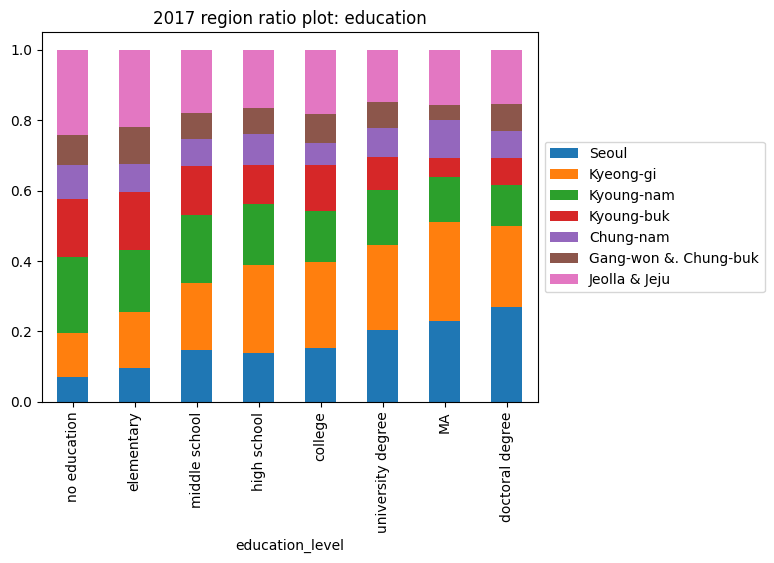

In [ ]:
kor_df
data = kor_df[kor_df['year']==2017]
ratio_plot_by_group(data ,"region", group="education_level",fig_kws = {"stacked":True,"title" : "2017 region ratio plot: education"})
x = np.array([0,1,2,3,4,5,6,7])
region = ['Seoul', 'Kyeong-gi', 'Kyoung-nam', 'Kyoung-buk', 'Chung-nam', 'Gang-won &. Chung-buk', 'Jeolla & Jeju']
education_level = ['no education', 'elementary', 'middle school', 'high school', 'college', 'university degree', 'MA', 'doctoral degree']
plt.xticks(x, education_level)
plt.legend(labels=region, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

고학력자들은 대부분 서울 및 수도권에 몰려있음을 확인할 수 있습니다. 

특정 데이터에 몰려있는지 확인하기 위해 왜도와 첨도를 확인

In [ ]:
kor_df_new = kor_df[2014<kor_df['year']]
kor_df_new = kor_df_new[2020>kor_df['year']]
male = kor_df_new.loc[kor_df_new['gender']==1]
female = kor_df_new.loc[kor_df_new['gender']==2]

print("남자 : ", male.size)
print("여자 : ", female.size)

numerical_feats = male.dtypes[male.dtypes != "object"].index 
for col in numerical_feats: 
    print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(male[col].skew()) , 
          ' ' , 
          'Kurtosis: {:06.2f}'.format(male[col].kurt()) 
         )


남자 :  261075
여자 :  130560
id              Skewness: 00.18   Kurtosis: -01.06
year            Skewness: 00.05   Kurtosis: -01.36
wave            Skewness: 00.05   Kurtosis: -01.36
region          Skewness: 00.33   Kurtosis: -01.23
income          Skewness: 25.54   Kurtosis: 2156.52
family_member   Skewness: 00.55   Kurtosis: -00.06
gender          Skewness: 00.00   Kurtosis: 000.00
year_born       Skewness: 00.01   Kurtosis: -01.00
education_level Skewness: 00.07   Kurtosis: -00.74
marriage        Skewness: 02.58   Kurtosis: 005.49
religion        Skewness: -0.29   Kurtosis: -01.92
occupation      Skewness: -0.25   Kurtosis: -01.26
company_size    Skewness: 00.93   Kurtosis: -00.65
reason_none_worker Skewness: -3.86   Kurtosis: 014.24


<ipython-input-41-544fb97ae799>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kor_df_new = kor_df_new[2020>kor_df['year']]


<ipython-input-42-7c334ac340b9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male["income"])


Text(0.5, 1.0, 'male income')

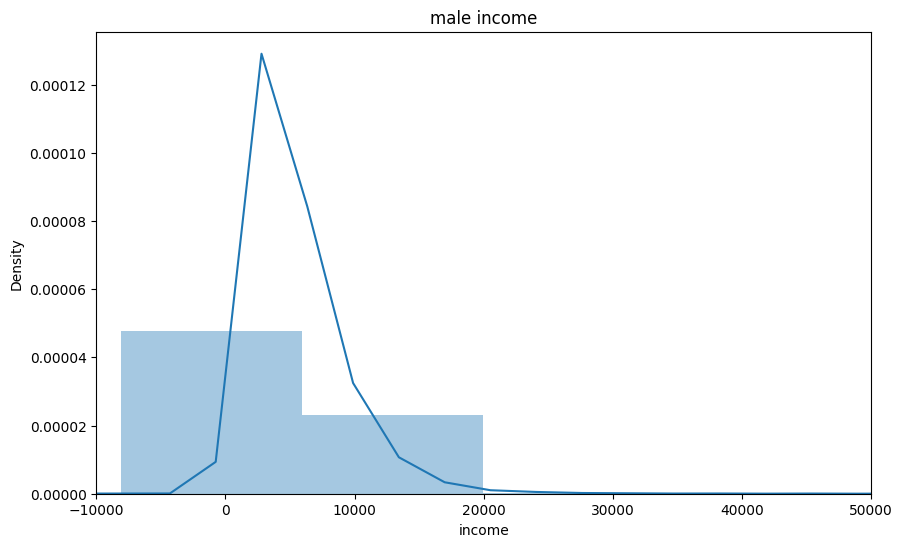

In [ ]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(male["income"])
plt.xlim(-10000, 50000)
plt.title('male income')

<ipython-input-44-331c6bf1af9b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female["income"])


Text(0.5, 1.0, 'female income')

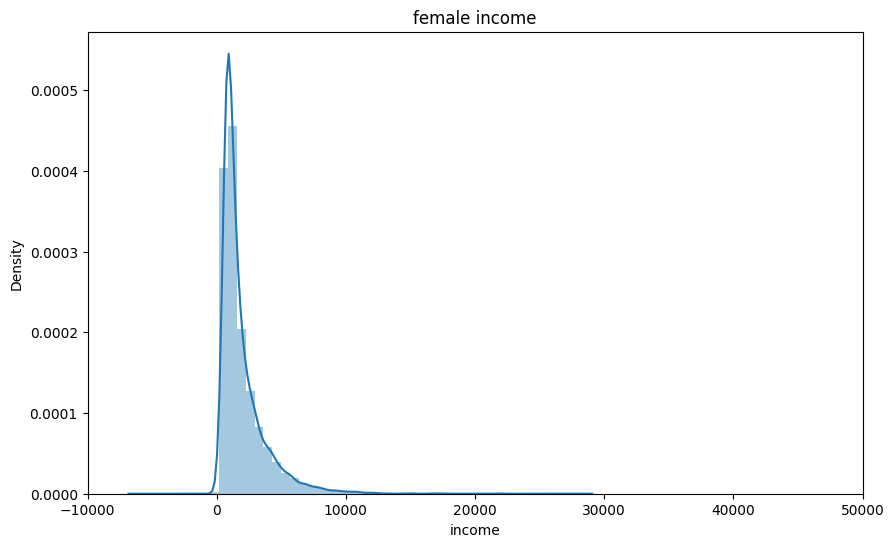

In [ ]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(female["income"])
plt.xlim(-10000, 50000)
plt.title('female income')

정규화 후 일반화한 결과

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-45-74cfeafdb987>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male["Log_income"] = np.log1p(male["income"])
<ipython-input-45-74cfeafdb987>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male["Log_income"])


Skewness: -0.455
Kurtosis: 1.313


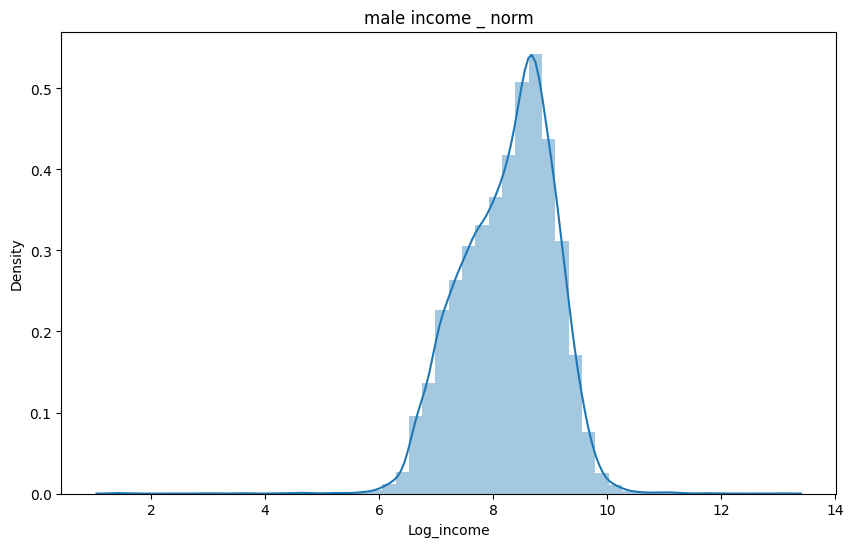

In [ ]:
male["Log_income"] = np.log1p(male["income"]) 
f, ax = plt.subplots(figsize = (10, 6)) 
plt.title('male income _ norm')
sns.distplot(male["Log_income"]) 
print("Skewness: {:.3f}".format(male["Log_income"].skew())) 
print("Kurtosis: {:.3f}".format(male["Log_income"].kurt()))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-48-be44ba506330>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female["Log_income"] = np.log1p(female["income"])
<ipython-input-48-be44ba506330>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female["Log_income

Skewness: 0.244
Kurtosis: 1.792


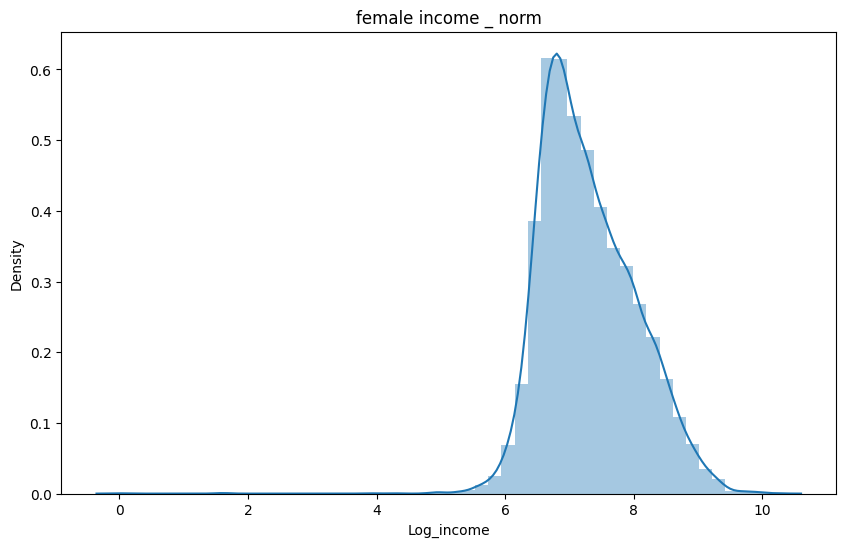

In [ ]:
female["Log_income"] = np.log1p(female["income"]) 
f, ax = plt.subplots(figsize = (10, 6)) 
plt.title('female income _ norm')
sns.distplot(female["Log_income"]) 
print("Skewness: {:.3f}".format(female["Log_income"].skew())) 
print("Kurtosis: {:.3f}".format(female["Log_income"].kurt()))